### ==============================================================================
### REDE NEURAL ARTIFICIAL (ANN) - EXEMPLO PRÁTICO PASSO A PASSO
### ==============================================================================

### Estrutura do Script:
### 1. Preparação dos Dados

Onde entra: Carregamento e processamento inicial
Comandos: make_classification(), train_test_split(), StandardScaler()

### 2. Funções de Ativação

Onde entra: Definição das funções matemáticas
Comandos: sigmoid(), relu(), e suas derivadas

### 3. Arquitetura da Rede

Onde entra: Classe SimpleANN com toda a estrutura
Comandos: Inicialização de pesos, bias, definição das camadas

### 4. Forward Propagation

Onde entra: Método forward_propagation()
Comandos: Multiplicação matricial, aplicação das funções de ativação

### 5. Backward Propagation

Onde entra: Método backward_propagation()
Comandos: Cálculo de gradientes, atualização de pesos

### 6. Treinamento

Onde entra: Método train()
Comandos: Loop de épocas, forward + backward + atualização

### 7. Avaliação

Onde entra: Métodos predict() e predict_proba()
Comandos: Métricas de performance, visualizações

### 8. Exemplo Prático

Onde entra: Demonstração passo a passo de uma predição
Comandos: Forward propagation detalhado para uma amostra

### Pontos-Chave para Entender:

Entrada → Processamento → Saída: O fluxo é sempre linear
Pesos e Bias: São os "parâmetros" que a rede aprende
Forward: Calcula predição
Backward: Ajusta pesos baseado no erro
Épocas: Repetições do processo de aprendizado

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

### PASSO 1: PREPARAÇÃO DOS DADOS

In [14]:
print("="*60)
print("PASSO 1: PREPARAÇÃO DOS DADOS")
print("="*60)

# Gerando dados sintéticos para classificação binária
X, y = make_classification(
    n_samples=1000,      # 1000 amostras
    n_features=2,        # 2 características (para visualização)
    n_redundant=0,       # Sem características redundantes
    n_informative=2,     # Todas as características são informativas
    n_clusters_per_class=1,  # 1 cluster por classe
    random_state=42
)

print(f"Formato dos dados: {X.shape}")
print(f"Formato dos rótulos: {y.shape}")
print(f"Primeiras 5 amostras:\n{X[:5]}")
print(f"Primeiros 5 rótulos: {y[:5]}")

# Dividindo dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Normalizando os dados (importante para ANNs)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nDados de treino: {X_train_scaled.shape}")
print(f"Dados de teste: {X_test_scaled.shape}")

PASSO 1: PREPARAÇÃO DOS DADOS
Formato dos dados: (1000, 2)
Formato dos rótulos: (1000,)
Primeiras 5 amostras:
[[ 0.60103418  1.5353525 ]
 [ 0.75594526 -1.1723519 ]
 [ 1.35447877 -0.94852841]
 [ 3.1030897   0.23348484]
 [ 0.75317779  0.78751427]]
Primeiros 5 rótulos: [1 0 0 0 1]

Dados de treino: (800, 2)
Dados de teste: (200, 2)


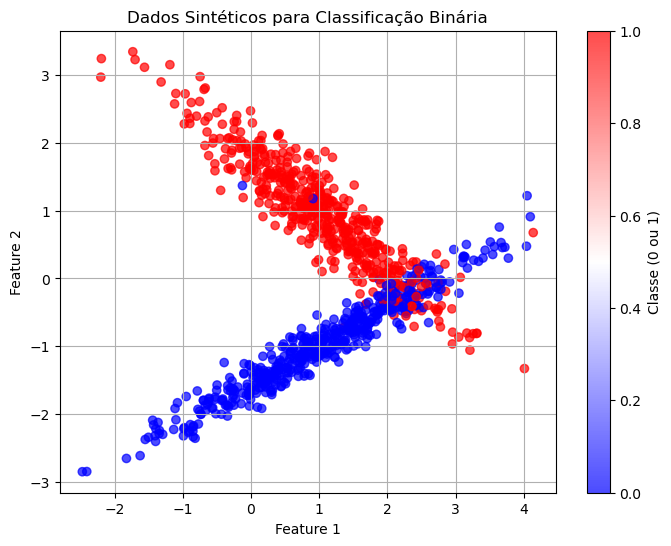

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.title("Dados Sintéticos para Classificação Binária")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Classe (0 ou 1)')
plt.grid(True)
plt.show()

### PASSO 2: DEFININDO AS FUNÇÕES DE ATIVAÇÃO

In [15]:
print("\n" + "="*60)
print("PASSO 2: FUNÇÕES DE ATIVAÇÃO")
print("="*60)

def sigmoid(x):
    """Função Sigmóide: f(x) = 1/(1 + e^(-x))"""
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))  # Clip para evitar overflow

def sigmoid_derivative(x):
    """Derivada da função sigmóide"""
    return x * (1 - x)

def relu(x):
    """Função ReLU: f(x) = max(0, x)"""
    return np.maximum(0, x)

def relu_derivative(x):
    """Derivada da função ReLU"""
    return (x > 0).astype(float)

print("Funções de ativação definidas:")
print("- Sigmoid (camadas ocultas)")
print("- ReLU (alternativa)")
print("- Suas derivadas para backpropagation")


PASSO 2: FUNÇÕES DE ATIVAÇÃO
Funções de ativação definidas:
- Sigmoid (camadas ocultas)
- ReLU (alternativa)
- Suas derivadas para backpropagation


### PASSO 3: CLASSE DA REDE NEURAL ARTIFICIAL

In [16]:
print("\n" + "="*60)
print("PASSO 3: ARQUITETURA DA REDE NEURAL")
print("="*60)

class SimpleANN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        """
        Inicializa a Rede Neural Artificial
        
        Parâmetros:
        - input_size: Número de neurônios na camada de entrada
        - hidden_size: Número de neurônios na camada oculta
        - output_size: Número de neurônios na camada de saída
        - learning_rate: Taxa de aprendizado
        """
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        # INICIALIZAÇÃO DOS PESOS E BIAS
        print(f"Inicializando rede com arquitetura: {input_size}-{hidden_size}-{output_size}")
        
        # Pesos da camada de entrada para camada oculta
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.5
        self.b1 = np.zeros((1, self.hidden_size))
        
        # Pesos da camada oculta para camada de saída
        self.W2 = np.random.randn(self.hidden_size, self.output_size) * 0.5
        self.b2 = np.zeros((1, self.output_size))
        
        print(f"Pesos W1 (entrada->oculta): {self.W1.shape}")
        print(f"Bias b1 (oculta): {self.b1.shape}")
        print(f"Pesos W2 (oculta->saída): {self.W2.shape}")
        print(f"Bias b2 (saída): {self.b2.shape}")
        
        # Lista para armazenar histórico de erros
        self.loss_history = []
    
    def forward_propagation(self, X):
        """
        FORWARD PROPAGATION - Propagação direta
        Calcula a saída da rede neural
        """
        # CAMADA DE ENTRADA -> CAMADA OCULTA
        # z1 = X * W1 + b1 (soma ponderada)
        self.z1 = np.dot(X, self.W1) + self.b1
        
        # a1 = sigmoid(z1) (aplicação da função de ativação)
        self.a1 = sigmoid(self.z1)
        
        # CAMADA OCULTA -> CAMADA DE SAÍDA
        # z2 = a1 * W2 + b2 (soma ponderada)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        
        # a2 = sigmoid(z2) (saída final)
        self.a2 = sigmoid(self.z2)
        
        return self.a2
    
    def compute_loss(self, y_true, y_pred):
        """
        Calcula o erro usando Mean Squared Error
        """
        m = y_true.shape[0]
        loss = np.sum((y_true - y_pred) ** 2) / (2 * m)
        return loss
    
    def backward_propagation(self, X, y, y_pred):
        """
        BACKWARD PROPAGATION - Retropropagação
        Calcula gradientes e atualiza pesos
        """
        m = X.shape[0]  # Número de amostras
        
        # GRADIENTES DA CAMADA DE SAÍDA
        # dL/dz2 = (y_pred - y) * sigmoid_derivative(a2)
        dz2 = (y_pred - y) * sigmoid_derivative(self.a2)
        
        # dL/dW2 = a1^T * dz2
        dW2 = np.dot(self.a1.T, dz2) / m
        
        # dL/db2 = média de dz2
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        
        # GRADIENTES DA CAMADA OCULTA
        # dL/da1 = dz2 * W2^T
        da1 = np.dot(dz2, self.W2.T)
        
        # dL/dz1 = da1 * sigmoid_derivative(a1)
        dz1 = da1 * sigmoid_derivative(self.a1)
        
        # dL/dW1 = X^T * dz1
        dW1 = np.dot(X.T, dz1) / m
        
        # dL/db1 = média de dz1
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        
        # ATUALIZAÇÃO DOS PESOS (Gradiente Descendente)
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
    
    def train(self, X, y, epochs=1000, verbose=True):
        """
        TREINAMENTO DA REDE NEURAL
        """
        print(f"\nIniciando treinamento por {epochs} épocas...")
        
        for epoch in range(epochs):
            # FORWARD PROPAGATION
            y_pred = self.forward_propagation(X)
            
            # CÁLCULO DO ERRO
            loss = self.compute_loss(y, y_pred)
            self.loss_history.append(loss)
            
            # BACKWARD PROPAGATION
            self.backward_propagation(X, y, y_pred)
            
            # EXIBIR PROGRESSO
            if verbose and epoch % 100 == 0:
                print(f"Época {epoch:4d} | Erro: {loss:.6f}")
        
        print(f"Treinamento concluído! Erro final: {loss:.6f}")
    
    def predict(self, X):
        """
        PREDIÇÃO
        """
        y_pred = self.forward_propagation(X)
        return (y_pred > 0.5).astype(int)
    
    def predict_proba(self, X):
        """
        PROBABILIDADES DE PREDIÇÃO
        """
        return self.forward_propagation(X)


PASSO 3: ARQUITETURA DA REDE NEURAL


### PASSO 4: CRIANDO E CONFIGURANDO A REDE

In [17]:
print("\n" + "="*60)
print("PASSO 4: CRIANDO A REDE NEURAL")
print("="*60)

# Definindo arquitetura da rede
input_size = X_train_scaled.shape[1]  # 2 características | Só da qtd. de colunas [lin, col]
hidden_size = 4                       # 4 neurônios na camada oculta
output_size = 1                       # 1 neurônio na saída (classificação binária)

# Criando a rede
ann = SimpleANN(
    input_size=input_size,
    hidden_size=hidden_size,
    output_size=output_size,
    learning_rate=0.1
)

# Preparando dados para a rede (reshape dos rótulos) | transforma em matriz de uma coluna
y_train_reshaped = y_train.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)


PASSO 4: CRIANDO A REDE NEURAL
Inicializando rede com arquitetura: 2-4-1
Pesos W1 (entrada->oculta): (2, 4)
Bias b1 (oculta): (1, 4)
Pesos W2 (oculta->saída): (4, 1)
Bias b2 (saída): (1, 1)


### PASSO 5: TREINAMENTO DA REDE

In [18]:
print("\n" + "="*60)
print("PASSO 5: TREINAMENTO")
print("="*60)

# Treinando a rede
ann.train(X_train_scaled, y_train_reshaped, epochs=1000, verbose=True)


PASSO 5: TREINAMENTO

Iniciando treinamento por 1000 épocas...
Época    0 | Erro: 0.124492
Época  100 | Erro: 0.120004
Época  200 | Erro: 0.115409
Época  300 | Erro: 0.110329
Época  400 | Erro: 0.104600
Época  500 | Erro: 0.098252
Época  600 | Erro: 0.091494
Época  700 | Erro: 0.084648
Época  800 | Erro: 0.078060
Época  900 | Erro: 0.072013
Treinamento concluído! Erro final: 0.066722


### PASSO 6: AVALIAÇÃO E RESULTADOS

In [19]:
print("\n" + "="*60)
print("PASSO 6: AVALIAÇÃO DOS RESULTADOS")
print("="*60)

# Predições
y_train_pred = ann.predict(X_train_scaled)
y_test_pred = ann.predict(X_test_scaled)

# Probabilidades
y_train_proba = ann.predict_proba(X_train_scaled)
y_test_proba = ann.predict_proba(X_test_scaled)

# Métricas de avaliação
train_accuracy = accuracy_score(y_train, y_train_pred.flatten())
test_accuracy = accuracy_score(y_test, y_test_pred.flatten())

print(f"Acurácia no treino: {train_accuracy:.4f}")
print(f"Acurácia no teste: {test_accuracy:.4f}")

print("\nRelatório de classificação (dados de teste):")
print(classification_report(y_test, y_test_pred.flatten()))


PASSO 6: AVALIAÇÃO DOS RESULTADOS
Acurácia no treino: 0.8938
Acurácia no teste: 0.8900

Relatório de classificação (dados de teste):
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       104
           1       0.91      0.85      0.88        96

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



### PASSO 7: VISUALIZAÇÃO DOS RESULTADOS


PASSO 7: VISUALIZAÇÃO


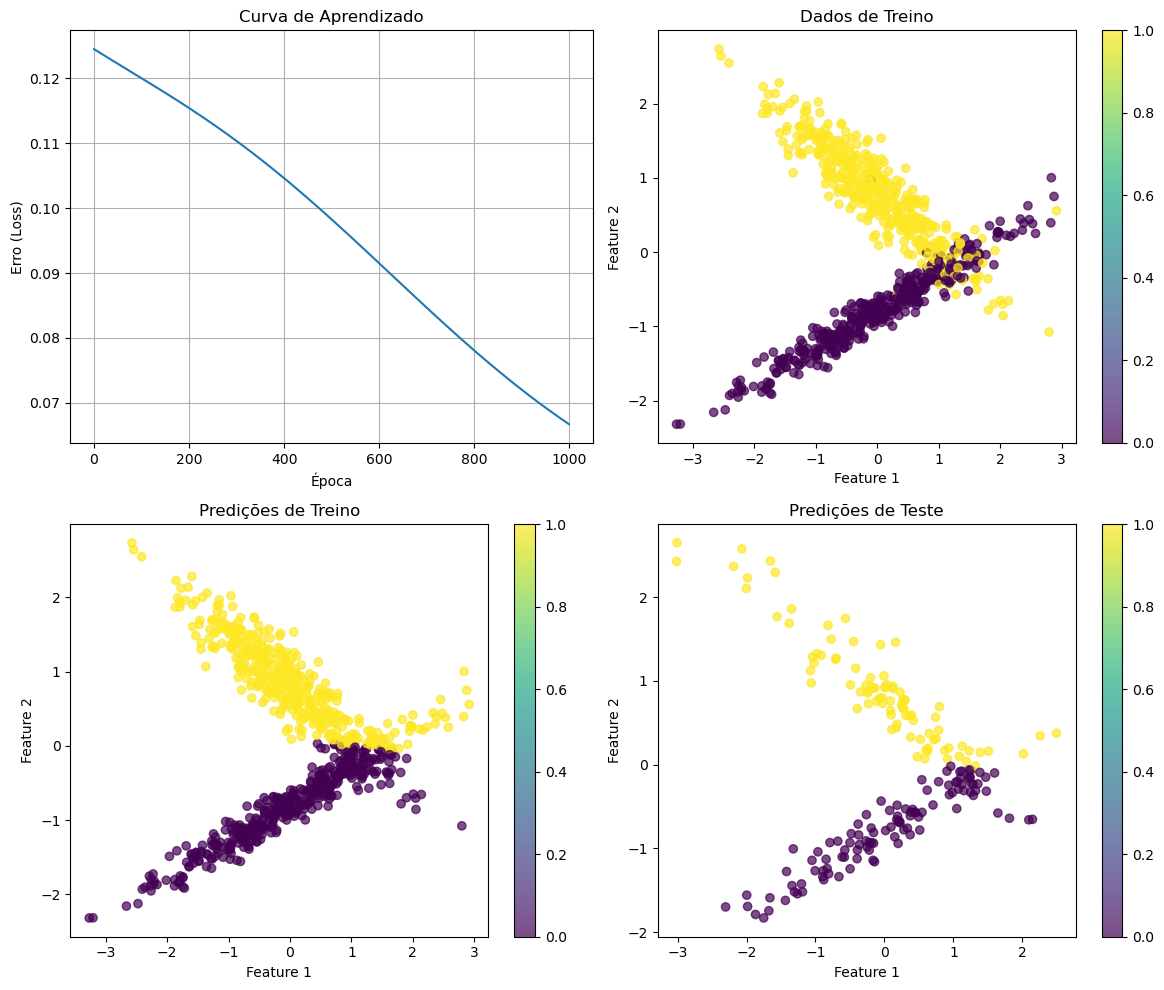

In [20]:
print("\n" + "="*60)
print("PASSO 7: VISUALIZAÇÃO")
print("="*60)

# Criando visualizações
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Curva de aprendizado
axes[0, 0].plot(ann.loss_history)
axes[0, 0].set_title('Curva de Aprendizado')
axes[0, 0].set_xlabel('Época')
axes[0, 0].set_ylabel('Erro (Loss)')
axes[0, 0].grid(True)

# 2. Dados de treino
scatter = axes[0, 1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], 
                           c=y_train, cmap='viridis', alpha=0.7)
axes[0, 1].set_title('Dados de Treino')
axes[0, 1].set_xlabel('Feature 1')
axes[0, 1].set_ylabel('Feature 2')
plt.colorbar(scatter, ax=axes[0, 1])

# 3. Predições de treino
scatter = axes[1, 0].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], 
                           c=y_train_pred.flatten(), cmap='viridis', alpha=0.7)
axes[1, 0].set_title('Predições de Treino')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')
plt.colorbar(scatter, ax=axes[1, 0])

# 4. Predições de teste
scatter = axes[1, 1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], 
                           c=y_test_pred.flatten(), cmap='viridis', alpha=0.7)
axes[1, 1].set_title('Predições de Teste')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')
plt.colorbar(scatter, ax=axes[1, 1])

plt.tight_layout()
plt.show()

### PASSO 8: EXEMPLO DE PREDIÇÃO INDIVIDUAL

In [21]:
print("\n" + "="*60)
print("PASSO 8: EXEMPLO DE PREDIÇÃO INDIVIDUAL")
print("="*60)

# Exemplo com uma amostra
sample_index = 0
sample = X_test_scaled[sample_index:sample_index+1]
true_label = y_test[sample_index]

print(f"Amostra de entrada: {sample[0]}")
print(f"Rótulo verdadeiro: {true_label}")

# Forward propagation passo a passo para esta amostra
print("\n--- FORWARD PROPAGATION DETALHADO ---")

# Camada de entrada -> oculta
z1 = np.dot(sample, ann.W1) + ann.b1
a1 = sigmoid(z1)
print(f"Camada oculta (z1): {z1[0]}")
print(f"Camada oculta (a1): {a1[0]}")

# Camada oculta -> saída
z2 = np.dot(a1, ann.W2) + ann.b2
a2 = sigmoid(z2)
print(f"Camada de saída (z2): {z2[0]}")
print(f"Camada de saída (a2): {a2[0]}")

# Predição final
prediction = (a2 > 0.5).astype(int)
probability = a2[0, 0]

print(f"\nProbabilidade: {probability:.4f}")
print(f"Predição: {prediction[0, 0]}")
print(f"Correto: {'Sim' if prediction[0, 0] == true_label else 'Não'}")


PASSO 8: EXEMPLO DE PREDIÇÃO INDIVIDUAL
Amostra de entrada: [0.16785555 0.43832313]
Rótulo verdadeiro: 1

--- FORWARD PROPAGATION DETALHADO ---
Camada oculta (z1): [-0.93162519 -0.47364755  0.30352465 -0.3913717 ]
Camada oculta (a1): [0.28259511 0.38375328 0.57530392 0.40338713]
Camada de saída (z2): [0.3512911]
Camada de saída (a2): [0.58693063]

Probabilidade: 0.5869
Predição: 1
Correto: Sim


### RESUMO FINAL

In [22]:
print("\n" + "="*60)
print("RESUMO DO PROCESSO")
print("="*60)

print("1. PREPARAÇÃO DOS DADOS:")
print("   - Carregamento e divisão treino/teste")
print("   - Normalização (StandardScaler)")

print("\n2. ARQUITETURA DA REDE:")
print(f"   - Entrada: {input_size} neurônios")
print(f"   - Camada oculta: {hidden_size} neurônios")
print(f"   - Saída: {output_size} neurônio")
print(f"   - Função de ativação: Sigmoid")

print("\n3. TREINAMENTO:")
print("   - Forward propagation (calcular saída)")
print("   - Cálculo do erro (Mean Squared Error)")
print("   - Backward propagation (atualizar pesos)")
print("   - Repetir por 1000 épocas")

print("\n4. RESULTADOS:")
print(f"   - Acurácia no treino: {train_accuracy:.4f}")
print(f"   - Acurácia no teste: {test_accuracy:.4f}")

print("\n5. COMPONENTES PRINCIPAIS:")
print("   - Pesos (W1, W2): Aprendidos durante treinamento")
print("   - Bias (b1, b2): Ajustes adicionais")
print("   - Funções de ativação: Sigmoid")
print("   - Otimizador: Gradiente Descendente")

print("\nScript concluído com sucesso!")


RESUMO DO PROCESSO
1. PREPARAÇÃO DOS DADOS:
   - Carregamento e divisão treino/teste
   - Normalização (StandardScaler)

2. ARQUITETURA DA REDE:
   - Entrada: 2 neurônios
   - Camada oculta: 4 neurônios
   - Saída: 1 neurônio
   - Função de ativação: Sigmoid

3. TREINAMENTO:
   - Forward propagation (calcular saída)
   - Cálculo do erro (Mean Squared Error)
   - Backward propagation (atualizar pesos)
   - Repetir por 1000 épocas

4. RESULTADOS:
   - Acurácia no treino: 0.8938
   - Acurácia no teste: 0.8900

5. COMPONENTES PRINCIPAIS:
   - Pesos (W1, W2): Aprendidos durante treinamento
   - Bias (b1, b2): Ajustes adicionais
   - Funções de ativação: Sigmoid
   - Otimizador: Gradiente Descendente

Script concluído com sucesso!
